In [1]:
# Add environment Packages paths to conda
import os, sys, warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import nltk # Text libarary
# nltk.download('stopwords')
import string # Removing special characters {#, @, ...}
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
from nltk.corpus import stopwords # Stopwords
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
from nltk.tokenize import word_tokenize

import pyarabic.araby as araby
from tashaphyne.stemming import ArabicLightStemmer

from nltk.stem import SnowballStemmer, WordNetLemmatizer # Stemmer & Lemmatizer
#from gensim.utils import simple_preprocess  # Text ==> List of Tokens

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from camel_tools.tokenizers.word import simple_word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping


# Saving Model
import pickle

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

In [2]:
train_p=pd.read_csv('train_Arabic_tweets_positive_20190413.tsv',sep='\t')
train_n=pd.read_csv('train_Arabic_tweets_negative_20190413.tsv',sep='\t')

test_p=pd.read_csv('test_Arabic_tweets_positive_20190413.tsv',sep='\t')
test_n=pd.read_csv('test_Arabic_tweets_negative_20190413.tsv',sep='\t')

In [3]:
print(f" train_n columns are {train_n.columns}")
print(f" train_p columns are {train_p.columns}")
print(f" test_p columns are {test_p.columns}")
print(f" test_n columns are {test_n.columns}")

 train_n columns are Index(['neg', 'ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ≤ÿßŸäÿØ üò≠'], dtype='object')
 train_p columns are Index(['pos', 'ŸÜÿ≠ŸÜ ÿßŸÑÿ∞ŸäŸÜ Ÿäÿ™ÿ≠ŸàŸÑ ŸÉŸÑ ŸÖÿß ŸÜŸàÿØ ÿ£ŸÜ ŸÜŸÇŸàŸÑŸá ÿ•ŸÑŸâ ÿØÿπÿßÿ° ŸÑŸÑŸáÿå ŸÑÿß ÿ™ÿ®ÿ≠ÿ´Ÿàÿß ŸÅŸäŸÜÿß ÿπŸÜ ŸÇŸàÿ©ÿå ÿ•ŸÜŸÜÿß ŸÖŸÉÿ≥Ÿàÿ±ŸàŸÜÿå ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ™Ÿä‚Ä¶'], dtype='object')
 test_p columns are Index(['pos', '#ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä ŸÅŸàÿ≤ ŸáŸÑÿßŸÑŸä ŸÖŸáŸÖ ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá üíô ÿ≤Ÿàÿ±ÿßŸÜ ŸÉÿßŸÜ ÿ®Ÿäÿ≥ŸÑŸÖ ÿßŸÑŸÖÿ®ÿßÿ±ÿßÿ© ÿ®ÿπÿØ ÿ™ÿ®ÿØŸäŸÑ ŸÉÿßÿ±ŸäŸäŸà ÿ®ÿ•ŸÜÿ™ÿ∏ÿßÿ± ÿßŸÑÿ•ÿ™ÿ≠ÿßÿØ ÿ®ŸÉÿ±ÿ© Ÿäÿßÿ±ÿ® Ÿäÿßÿ±‚Ä¶'], dtype='object')
 test_n columns are Index(['neg', 'ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠'], dtype='object')


In [4]:
train_p.rename(columns={'pos':'label' ,  'ŸÜÿ≠ŸÜ ÿßŸÑÿ∞ŸäŸÜ Ÿäÿ™ÿ≠ŸàŸÑ ŸÉŸÑ ŸÖÿß ŸÜŸàÿØ ÿ£ŸÜ ŸÜŸÇŸàŸÑŸá ÿ•ŸÑŸâ ÿØÿπÿßÿ° ŸÑŸÑŸáÿå ŸÑÿß ÿ™ÿ®ÿ≠ÿ´Ÿàÿß ŸÅŸäŸÜÿß ÿπŸÜ ŸÇŸàÿ©ÿå ÿ•ŸÜŸÜÿß ŸÖŸÉÿ≥Ÿàÿ±ŸàŸÜÿå ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ™Ÿä‚Ä¶':'text'} , inplace=True)
train_n.rename(columns={'neg':'label' , 'ÿßÿπÿ™ÿ±ŸÅ ÿßŸÜ ÿ®ÿ™ÿ≥ ŸÉÿßŸÜŸà ÿ¥ŸàŸä ÿ¥ŸàŸä Ÿäÿ¨Ÿäÿ®Ÿà ÿ±ÿßÿ≥Ÿä ŸÑŸÉŸÜ ÿßŸÑŸäŸàŸÖ ÿ®ÿßŸÑÿ≤ÿßŸäÿØ üò≠':'text' } , inplace=True)

test_p.rename(columns={'pos':'label' , '#ÿßŸÑŸáŸÑÿßŸÑ_ÿßŸÑÿßŸáŸÑŸä ŸÅŸàÿ≤ ŸáŸÑÿßŸÑŸä ŸÖŸáŸÖ ÿßŸÑÿ≠ŸÖÿØ ŸÑŸÑŸá üíô ÿ≤Ÿàÿ±ÿßŸÜ ŸÉÿßŸÜ ÿ®Ÿäÿ≥ŸÑŸÖ ÿßŸÑŸÖÿ®ÿßÿ±ÿßÿ© ÿ®ÿπÿØ ÿ™ÿ®ÿØŸäŸÑ ŸÉÿßÿ±ŸäŸäŸà ÿ®ÿ•ŸÜÿ™ÿ∏ÿßÿ± ÿßŸÑÿ•ÿ™ÿ≠ÿßÿØ ÿ®ŸÉÿ±ÿ© Ÿäÿßÿ±ÿ® Ÿäÿßÿ±‚Ä¶':'text'} , inplace=True)
test_n.rename(columns={'neg':'label' , 'ÿ≠ÿ™Ÿâ ÿßŸÑÿßŸäÿ™ŸàŸÜÿ≤ ÿÆÿ±ÿ®ÿ™ŸàŸá ŸÖŸà ÿµÿßÿ≠ŸäŸÜ ÿßŸÜÿ™Ÿàÿüÿü üò≠':'text'} , inplace=True)

In [5]:
print(f" train_n columns are {train_n.columns}")
print(f" train_p columns are {train_p.columns}")
print(f" test_p columns are {test_p.columns}")
print(f" test_n columns are {test_n.columns}")

 train_n columns are Index(['label', 'text'], dtype='object')
 train_p columns are Index(['label', 'text'], dtype='object')
 test_p columns are Index(['label', 'text'], dtype='object')
 test_n columns are Index(['label', 'text'], dtype='object')


In [6]:
data = [train_p , train_n ,test_p , test_n]
for df in data:
    for cols in list(df.columns):
        if cols == 'pos' or cols == 'neg':
            print(f'{df} not builded well')
     

In [7]:
train_df = pd.concat([train_p , train_n])
train_df = train_df.sample(frac=1).reset_index(drop=True)


test_df = pd.concat([test_p , test_n])
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [8]:
train_df

label                                               text
0       pos  ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ© ŸÅŸàÿ≤ ÿßŸÑŸáŸÑÿßŸÑ .. üíô ÿ≥ÿ≠ÿ® ÿπŸÑŸâ ÿ¢ŸäŸÅŸàŸÜ XRüì± ÿ±ÿ™ŸàŸä...
1       pos  #ÿßŸÑÿßÿ™ÿ≠ÿßÿØ_ÿßŸÑŸÜÿµÿ± ŸÑÿßÿ™ÿ≠ÿ≥ÿ®ŸàŸÜÿß ŸÜÿ≥ŸäŸÜÿß ŸäÿßŸÑÿ∑ŸàÿßŸÇŸä ŸàŸÑÿßŸÜÿ®Ÿä...
2       neg  ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸäŸÉŸàŸÜ ŸÅ ÿ≠ÿ≥ÿßÿ® Ÿàÿßÿ≠ÿØ ÿπ ŸÉŸÑ ŸÖŸàÿ®ÿßŸäŸÑ Ÿäÿß ÿ™ŸàŸäÿ™ÿ± ...
3       neg              ŸÅŸàŸÑŸàüëá ŸàÿßŸÑÿ®ÿßŸÉ ÿ≠ÿßŸÑÿß üîô ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å©‚Å¶ ‚Å¶‚Å©‚Å¶‚Ä¶
4       neg               ÿ®ÿ¨Ÿä ÿßÿπŸàÿ∂ŸÉŸÖ ŸÖÿπŸÑŸäÿ¥ ŸÖŸÉÿ±ŸàŸÅÿ© ÿ®ÿπÿ±ÿ® ÿßÿ±ŸÖŸä ŸáŸá
...     ...                                                ...
45268   neg                           ŸÑÿß Ÿäÿßÿ±ÿßŸÅÿß ŸÑÿß ÿ™ŸÉŸÅŸâ ÿ™ŸÉŸÅŸâ üò≠
45269   neg                        Ÿàÿ∂ÿπŸä ÿ≠ÿßŸÑŸäÿß üò§ #ÿßŸÑÿßÿ™ÿ≠ÿßÿØ_ÿßŸÑŸÜÿµÿ±
45270   neg  ŸÑÿß ŸÖÿ≠ÿ®ÿ™ŸáŸÖ üíñ ÿ™ÿ®ŸÜŸäŸÑŸä ŸÇÿµÿ± ‚õ™ Ÿà ŸÑÿß ŸÉÿ±ŸáŸÖ üíîŸäÿ≠ŸÅÿ±ŸÑŸä ŸÇÿ®ÿ±...
45271   neg  ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸäŸÉŸàŸÜ ÿßŸÑÿ´ÿßŸÑÿ´ ÿ®ÿ≥ ÿßŸäÿ¥ ŸÜÿ≥ŸàŸä üíî #BeautifulGo...
45272   neg                                       ÿ¥Ÿäÿ∑ÿßŸÜ ÿ±ÿ≠ŸäŸÖ ü§î

[45273 rows x 2 columns]

In [9]:
test_df

label                                               text
0       pos                            ŸÖÿßŸäÿØÿ±Ÿä Ÿàÿ¥ Ÿäÿ≥ŸàŸä ÿ®ŸÅŸÑŸàÿ≥Ÿá üòÇ
1       neg  ÿ™ÿ±Ÿâ ÿ≠ÿ∏Ÿä ŸÜŸÅÿ≥ ÿ®ŸàŸÉÿ±Ÿäÿ¥Ÿá ÿßŸÑŸÑŸä ÿ®ÿ∫Ÿâ ŸäÿµŸàÿ± ÿ≥ŸäŸÑŸÅŸä ŸÖÿπÿßŸáÿß ...
2       neg  Ÿäÿß ÿßÿÆŸàÿßŸÜÿß Ÿà ÿßŸÑŸÑŸá ŸÑÿ≥ÿ© ŸÖÿ∑ÿßŸÑÿ®ŸÜÿß ŸÖÿß ÿ£ÿ™ÿ≠ŸÇŸÇ ŸÖŸÜŸáÿß ÿ∫Ÿäÿ±...
3       neg                           ÿ≠ÿ≥ÿßŸÅŸá ÿπŸÑŸâ ÿ¨ŸàÿØÿ© ÿßŸÑÿ™ÿπŸÑŸäŸÖ üò≠
4       neg  Ÿäÿßÿ±ÿ® ÿßŸÜÿß ÿ™ÿßŸäŸá ÿØŸÑŸÜŸä üíî ÿØÿπŸàÿßÿ™ŸÉŸÖ ŸÑŸäÿß ŸÅÿ∂ŸÑÿß ŸàŸÑŸäÿ≥ ÿßŸÖÿ±...
...     ...                                                ...
11513   pos  ŸÑÿ≥ÿ™ ÿ®ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ™ÿÆŸäŸÑŸáÿßÿå ÿ•ŸÜŸÖÿß ÿßŸÜÿß ŸÑÿß ÿ£ÿ®ÿßŸÑŸä ÿ®ŸÖÿπ...
11514   neg                                       ÿµÿ®ÿßÿ≠ ÿßŸÑÿÆŸäÿ± ‚úã
11515   neg  ÿßŸÑŸÜÿ∑ÿπ ÿØÿß ÿßŸÑŸÑŸä ÿßÿ™ŸÇŸÅŸÑ ÿ≠ÿ≥ÿßÿ®Ÿá ŸÖŸÜ ÿ¥ŸàŸäŸá ÿØÿÆŸÑ ÿ®ÿ≠ÿ≥ÿßÿ® ÿ™ÿß...
11516   neg  ÿßŸÑÿßÿ∫ÿßŸÜŸâ ÿØŸâ ÿ®ÿ≠ÿ®Ÿáÿß ÿ¨ÿØÿß ÿ®ÿ≠ÿ® ÿßŸÑŸÖŸàÿØ ÿ®ÿ™ÿßÿπŸáÿß ÿßŸàŸàŸâ üíî ÿ¨...
11517   neg  Ÿäÿßÿ±ÿ® ŸÑŸÖ Ÿäÿ®ŸÇŸâ ŸÑÿØŸä ÿßŸÑŸÇŸàŸá üò¢ . ŸÅÿ®ÿπÿ≤ÿ™ŸÉ Ÿàÿ¨ŸÑÿßŸÑŸÉ ÿ£ŸàŸÉŸÑÿ™...

[11518 rows x 2 columns]

In [10]:
train_df.isnull().sum()

label    0
text     0
dtype: int64

In [11]:
test_df.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
train_df.duplicated().sum()

15721

In [13]:
train_df.drop_duplicates(inplace=True)
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated().sum()

2678

In [15]:
test_df.drop_duplicates(inplace=True)
test_df.duplicated().sum()

0

In [16]:
data = pd.concat([train_df , test_df])

data

label                                               text
0       pos  ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ© ŸÅŸàÿ≤ ÿßŸÑŸáŸÑÿßŸÑ .. üíô ÿ≥ÿ≠ÿ® ÿπŸÑŸâ ÿ¢ŸäŸÅŸàŸÜ XRüì± ÿ±ÿ™ŸàŸä...
1       pos  #ÿßŸÑÿßÿ™ÿ≠ÿßÿØ_ÿßŸÑŸÜÿµÿ± ŸÑÿßÿ™ÿ≠ÿ≥ÿ®ŸàŸÜÿß ŸÜÿ≥ŸäŸÜÿß ŸäÿßŸÑÿ∑ŸàÿßŸÇŸä ŸàŸÑÿßŸÜÿ®Ÿä...
2       neg  ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸäŸÉŸàŸÜ ŸÅ ÿ≠ÿ≥ÿßÿ® Ÿàÿßÿ≠ÿØ ÿπ ŸÉŸÑ ŸÖŸàÿ®ÿßŸäŸÑ Ÿäÿß ÿ™ŸàŸäÿ™ÿ± ...
3       neg              ŸÅŸàŸÑŸàüëá ŸàÿßŸÑÿ®ÿßŸÉ ÿ≠ÿßŸÑÿß üîô ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å©‚Å¶ ‚Å¶‚Å©‚Å¶‚Ä¶
4       neg               ÿ®ÿ¨Ÿä ÿßÿπŸàÿ∂ŸÉŸÖ ŸÖÿπŸÑŸäÿ¥ ŸÖŸÉÿ±ŸàŸÅÿ© ÿ®ÿπÿ±ÿ® ÿßÿ±ŸÖŸä ŸáŸá
...     ...                                                ...
11505   neg   ÿßŸÑÿ®ŸàŸÖÿßÿßÿ™ ÿßÿ∫ÿßŸÜŸä üò≠ ŸÇŸàŸÑŸà ÿßÿ≥ŸÖ ÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ Ÿäÿ≥ŸàŸä ŸÖÿ´ŸÑŸáŸÖŸÖüò≠üòç
11506   neg  Ÿáÿ∞ÿß ÿßŸÑŸä ÿ≠ÿ∂ŸÜ ÿ®ŸàŸÖ ÿ¥ŸÅÿ™Ÿá ŸàŸÉŸÜÿ™ ÿ¥ÿßŸÉŸá ÿßÿ∞ÿß ŸáŸà ÿßŸà ŸÑÿßÿå ŸÖ...
11507   pos                       ÿ∑ŸÅŸäÿ™ ÿ®ÿ≥. ÿ™ŸÖÿ≥ŸàŸÜ ŸÅŸä ÿÆŸäÿ± ŸàŸáŸÜÿß üíö
11511   neg  ÿ™ÿ±ÿß ŸÖÿ±Ÿá ÿ®ÿ∑ŸÅÿ¥ ŸÑÿ£ŸÜŸä ÿ®ŸÇÿ∂ŸäŸá ŸÑÿ≠ÿßŸÑŸä üòû ŸÅŸäŸá ÿµÿ≠ÿ®ÿßÿ™Ÿä ÿ®Ÿäÿ¨...
11513   pos  ŸÑÿ≥ÿ™ ÿ®ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ™ÿÆŸäŸÑŸáÿßÿå ÿ•ŸÜŸÖÿß ÿßŸÜÿß ŸÑÿß ÿ£ÿ®ÿßŸÑŸä ÿ®ŸÖÿπ...

[38392 rows x 2 columns]

In [17]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [18]:
data.to_csv('new_data.csv' , index=False)

In [19]:
data = data.reset_index(drop=True)

In [20]:
data.duplicated().sum()

2518

In [21]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [22]:
data.reset_index(drop=True, inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35874 entries, 0 to 35873
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   35874 non-null  object
 1   text    35874 non-null  object
dtypes: object(2)
memory usage: 560.7+ KB


In [24]:
data.label.value_counts()

label
neg    18409
pos    17465
Name: count, dtype: int64

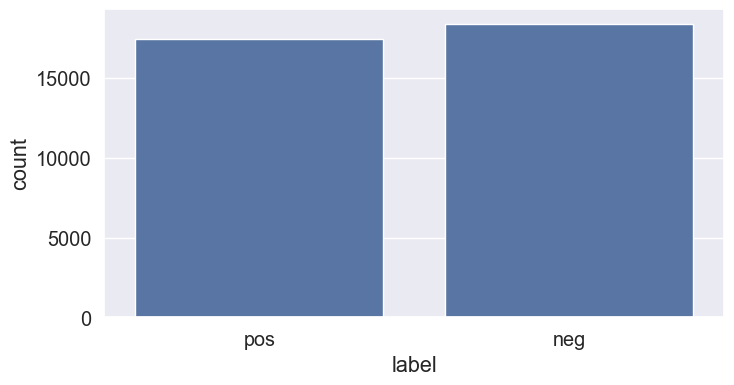

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='label', data=data);

In [26]:
arabic_stopwords = stopwords.words("arabic")
len(arabic_stopwords)

754

In [27]:
data['stop_words'] = data['text'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
data.stop_words.value_counts()

stop_words
0     10489
1     10004
2      6524
3      3970
4      2384
5      1266
6       679
7       303
8       111
9        50
10       22
11        9
29        4
35        3
12        3
13        3
23        3
18        3
56        3
37        3
44        2
48        2
19        2
52        2
24        2
58        2
38        2
25        2
15        1
42        1
22        1
76        1
70        1
45        1
16        1
21        1
61        1
64        1
50        1
72        1
69        1
20        1
33        1
17        1
28        1
57        1
34        1
36        1
26        1
60        1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

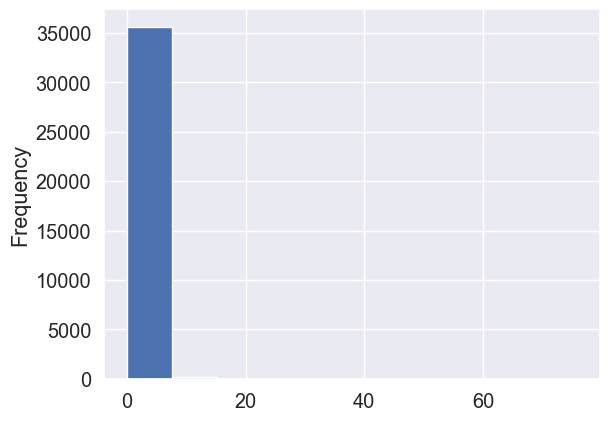

In [28]:
data['stop_words'].plot(kind= 'hist')

In [29]:
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

data['emoji_count'] = data['text'].apply(lambda x: emoji_counter(x))
data.emoji_count.value_counts()[:10]

emoji_count
1    24351
0     5082
2     2995
3     1653
4      742
5      423
6      199
7      120
8       70
9       41
Name: count, dtype: int64

In [30]:
emojis_data = data[data['emoji_count'] > 0]
emojis_data

label                                               text  stop_words  \
0       pos  ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ© ŸÅŸàÿ≤ ÿßŸÑŸáŸÑÿßŸÑ .. üíô ÿ≥ÿ≠ÿ® ÿπŸÑŸâ ÿ¢ŸäŸÅŸàŸÜ XRüì± ÿ±ÿ™ŸàŸä...           2   
2       neg  ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸäŸÉŸàŸÜ ŸÅ ÿ≠ÿ≥ÿßÿ® Ÿàÿßÿ≠ÿØ ÿπ ŸÉŸÑ ŸÖŸàÿ®ÿßŸäŸÑ Ÿäÿß ÿ™ŸàŸäÿ™ÿ± ...           5   
3       neg              ŸÅŸàŸÑŸàüëá ŸàÿßŸÑÿ®ÿßŸÉ ÿ≠ÿßŸÑÿß üîô ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å©‚Å¶ ‚Å¶‚Å©‚Å¶‚Ä¶           0   
5       pos                                         ŸÑŸäŸá ÿ™ÿØÿπŸä üòÇ           0   
6       neg  ÿ•ŸÜ ŸÑŸÖ ÿ™ŸÉŸàŸÜŸàÿß ÿ£ŸàŸÅŸäÿßÿ° ÿå ŸÅŸÑÿß ÿ™ÿπÿ®ÿ´Ÿàÿß ÿ®ŸÇŸÑŸàÿ® ÿßŸÑÿ£ŸÜŸÇŸäÿßÿ° ü•Ä           3   
...     ...                                                ...         ...   
35869   neg   ÿßŸÑÿ®ŸàŸÖÿßÿßÿ™ ÿßÿ∫ÿßŸÜŸä üò≠ ŸÇŸàŸÑŸà ÿßÿ≥ŸÖ ÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ Ÿäÿ≥ŸàŸä ŸÖÿ´ŸÑŸáŸÖŸÖüò≠üòç           1   
35870   neg  Ÿáÿ∞ÿß ÿßŸÑŸä ÿ≠ÿ∂ŸÜ ÿ®ŸàŸÖ ÿ¥ŸÅÿ™Ÿá ŸàŸÉŸÜÿ™ ÿ¥ÿßŸÉŸá ÿßÿ∞ÿß ŸáŸà ÿßŸà ŸÑÿßÿå ŸÖ...           4   
35871   pos                       ÿ∑ŸÅŸäÿ™ ÿ®ÿ≥. ÿ™ŸÖÿ≥ŸàŸÜ ŸÅŸä ÿÆŸäÿ± ŸàŸáŸÜÿß üíö           1   
35872   neg  ÿ™ÿ±ÿß ŸÖÿ±Ÿá ÿ®ÿ∑ŸÅÿ¥ ŸÑÿ£ŸÜŸä ÿ®ŸÇÿ∂ŸäŸá ŸÑÿ≠ÿßŸÑŸä üòû ŸÅŸäŸá ÿµÿ≠ÿ®ÿßÿ™Ÿä ÿ®Ÿäÿ¨...           3   
35873   pos  ŸÑÿ≥ÿ™ ÿ®ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ™ÿÆŸäŸÑŸáÿßÿå ÿ•ŸÜŸÖÿß ÿßŸÜÿß ŸÑÿß ÿ£ÿ®ÿßŸÑŸä ÿ®ŸÖÿπ...           5   

       emoji_count  
0                3  
2                1  
3                2  
5                1  
6                1  
...            ...  
35869            3  
35870            1  
35871            1  
35872            1  
35873            1  

[30792 rows x 4 columns]

In [31]:
def extract_emoji(text):
    import emoji
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [32]:
emojis_data['emoji'] = emojis_data['text'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))

In [33]:
emojis_data

label                                               text  stop_words  \
0       pos  ÿ®ŸÖŸÜÿßÿ≥ÿ®ÿ© ŸÅŸàÿ≤ ÿßŸÑŸáŸÑÿßŸÑ .. üíô ÿ≥ÿ≠ÿ® ÿπŸÑŸâ ÿ¢ŸäŸÅŸàŸÜ XRüì± ÿ±ÿ™ŸàŸä...           2   
2       neg  ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸäŸÉŸàŸÜ ŸÅ ÿ≠ÿ≥ÿßÿ® Ÿàÿßÿ≠ÿØ ÿπ ŸÉŸÑ ŸÖŸàÿ®ÿßŸäŸÑ Ÿäÿß ÿ™ŸàŸäÿ™ÿ± ...           5   
3       neg              ŸÅŸàŸÑŸàüëá ŸàÿßŸÑÿ®ÿßŸÉ ÿ≠ÿßŸÑÿß üîô ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å©‚Å¶ ‚Å¶‚Å©‚Å¶‚Ä¶           0   
5       pos                                         ŸÑŸäŸá ÿ™ÿØÿπŸä üòÇ           0   
6       neg  ÿ•ŸÜ ŸÑŸÖ ÿ™ŸÉŸàŸÜŸàÿß ÿ£ŸàŸÅŸäÿßÿ° ÿå ŸÅŸÑÿß ÿ™ÿπÿ®ÿ´Ÿàÿß ÿ®ŸÇŸÑŸàÿ® ÿßŸÑÿ£ŸÜŸÇŸäÿßÿ° ü•Ä           3   
...     ...                                                ...         ...   
35869   neg   ÿßŸÑÿ®ŸàŸÖÿßÿßÿ™ ÿßÿ∫ÿßŸÜŸä üò≠ ŸÇŸàŸÑŸà ÿßÿ≥ŸÖ ÿ¥ÿÆÿµ Ÿàÿßÿ≠ÿØ Ÿäÿ≥ŸàŸä ŸÖÿ´ŸÑŸáŸÖŸÖüò≠üòç           1   
35870   neg  Ÿáÿ∞ÿß ÿßŸÑŸä ÿ≠ÿ∂ŸÜ ÿ®ŸàŸÖ ÿ¥ŸÅÿ™Ÿá ŸàŸÉŸÜÿ™ ÿ¥ÿßŸÉŸá ÿßÿ∞ÿß ŸáŸà ÿßŸà ŸÑÿßÿå ŸÖ...           4   
35871   pos                       ÿ∑ŸÅŸäÿ™ ÿ®ÿ≥. ÿ™ŸÖÿ≥ŸàŸÜ ŸÅŸä ÿÆŸäÿ± ŸàŸáŸÜÿß üíö           1   
35872   neg  ÿ™ÿ±ÿß ŸÖÿ±Ÿá ÿ®ÿ∑ŸÅÿ¥ ŸÑÿ£ŸÜŸä ÿ®ŸÇÿ∂ŸäŸá ŸÑÿ≠ÿßŸÑŸä üòû ŸÅŸäŸá ÿµÿ≠ÿ®ÿßÿ™Ÿä ÿ®Ÿäÿ¨...           3   
35873   pos  ŸÑÿ≥ÿ™ ÿ®ÿßŸÑŸÇŸàÿ© ÿßŸÑÿ™Ÿä ÿ™ÿ™ÿÆŸäŸÑŸáÿßÿå ÿ•ŸÜŸÖÿß ÿßŸÜÿß ŸÑÿß ÿ£ÿ®ÿßŸÑŸä ÿ®ŸÖÿπ...           5   

       emoji_count  emoji  
0                3  üíô üì± üí™  
2                1      üòè  
3                2    üëá üîô  
5                1      üòÇ  
6                1      ü•Ä  
...            ...    ...  
35869            3  üò≠ üò≠ üòç  
35870            1      üò≠  
35871            1      üíö  
35872            1      üòû  
35873            1      üòå  

[30792 rows x 5 columns]

In [34]:
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

üíî    4492
üòÇ    3910
üò≠    2289
üåπ    1596
üíô    1531
ü§î    1167
üòî    1110
‚ù§    1089
üåö    1076
üíõ     952
Name: count, dtype: int64

In [35]:
emojis = {
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "üòÇ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üíî":"ŸÇŸÑÿ® ÿ≠ÿ≤ŸäŸÜ",
    "üôÇ":"Ÿäÿ®ÿ™ÿ≥ŸÖ",
    "‚ù§Ô∏è":"ÿ≠ÿ®",
    "‚ù§":"ÿ≠ÿ®",
    "üòç":"ÿ≠ÿ®",
    "üò≠":"Ÿäÿ®ŸÉŸä",
    "üò¢":"ÿ≠ÿ≤ŸÜ",
    "üòî":"ÿ≠ÿ≤ŸÜ",
    "‚ô•":"ÿ≠ÿ®",
    "üíú":"ÿ≠ÿ®",
    "üòÖ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üôÅ":"ÿ≠ÿ≤ŸäŸÜ",
    "üíï":"ÿ≠ÿ®",
    "üíô":"ÿ≠ÿ®",
    "üòû":"ÿ≠ÿ≤ŸäŸÜ",
    "üòä":"ÿ≥ÿπÿßÿØÿ©",
    "üëè":"ŸäÿµŸÅŸÇ",
    "üëå":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "üò¥":"ŸäŸÜÿßŸÖ",
    "üòÄ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòå":"ÿ≠ÿ≤ŸäŸÜ",
    "üåπ":"Ÿàÿ±ÿØÿ©",
    "üôà":"ÿ≠ÿ®",
    "üòÑ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòê":"ŸÖÿ≠ÿßŸäÿØ",
    "‚úå":"ŸÖŸÜÿ™ÿµÿ±",
    "‚ú®":"ŸÜÿ¨ŸÖŸá",
    "ü§î":"ÿ™ŸÅŸÉŸäÿ±",
    "üòè":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üòí":"Ÿäÿ≥ÿ™Ÿáÿ≤ÿ°",
    "üôÑ":"ŸÖŸÑŸÑ",
    "üòï":"ÿπÿµÿ®Ÿäÿ©",
    "üòÉ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üå∏":"Ÿàÿ±ÿØÿ©",
    "üòì":"ÿ≠ÿ≤ŸÜ",
    "üíû":"ÿ≠ÿ®",
    "üíó":"ÿ≠ÿ®",
    "üòë":"ŸÖŸÜÿ≤ÿπÿ¨",
    "üí≠":"ÿ™ŸÅŸÉŸäÿ±",
    "üòé":"ÿ´ŸÇÿ©",
    "üíõ":"ÿ≠ÿ®",
    "üò©":"ÿ≠ÿ≤ŸäŸÜ",
    "üí™":"ÿπÿ∂ŸÑÿßÿ™",
    "üëç":"ŸÖŸàÿßŸÅŸÇ",
    "üôèüèª":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üò≥":"ŸÖÿµÿØŸàŸÖ",
    "üëèüèº":"ÿ™ÿµŸÅŸäŸÇ",
    "üé∂":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üåö":"ÿµŸÖÿ™",
    "üíö":"ÿ≠ÿ®",
    "üôè":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíò":"ÿ≠ÿ®",
    "üçÉ":"ÿ≥ŸÑÿßŸÖ",
    "‚ò∫":"Ÿäÿ∂ÿ≠ŸÉ",
    "üê∏":"ÿ∂ŸÅÿØÿπ",
    "üò∂":"ŸÖÿµÿØŸàŸÖ",
    "‚úåÔ∏è":"ŸÖÿ±ÿ≠",
    "‚úãüèª":"ÿ™ŸàŸÇŸÅ",
    "üòâ":"ÿ∫ŸÖÿ≤ÿ©",
    "üå∑":"ÿ≠ÿ®",
    "üôÉ":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "üò´":"ÿ≠ÿ≤ŸäŸÜ",
    "üò®":"ŸÖÿµÿØŸàŸÖ",
    "üéº ":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "üçÅ":"ŸÖÿ±ÿ≠",
    "üçÇ":"ŸÖÿ±ÿ≠",
    "üíü":"ÿ≠ÿ®",
    "üò™":"ÿ≠ÿ≤ŸÜ",
    "üòÜ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üò£":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "‚ò∫Ô∏è":"ÿ≠ÿ®",
    "üò±":"ŸÉÿßÿ±ÿ´ÿ©",
    "üòÅ":"Ÿäÿ∂ÿ≠ŸÉ",
    "üòñ":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üèÉüèº":"Ÿäÿ¨ÿ±Ÿä",
    "üò°":"ÿ∫ÿ∂ÿ®",
    "üö∂":"Ÿäÿ≥Ÿäÿ±",
    "ü§ï":"ŸÖÿ±ÿ∂",
    "‚ÄºÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üïä":"ÿ∑ÿßÿ¶ÿ±",
    "üëåüèª":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚ù£":"ÿ≠ÿ®",
    "üôä":"ŸÖÿµÿØŸàŸÖ",
    "üíÉ":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üíÉüèº":"ÿ≥ÿπÿßÿØÿ© ŸÖÿ±ÿ≠",
    "üòú":"ŸÖÿ±ÿ≠",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "üòü":"ÿßÿ≥ÿ™Ÿäÿßÿ°",
    "üíñ":"ÿ≠ÿ®",
    "üò•":"ÿ≠ÿ≤ŸÜ",
    "üéª":"ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚úí":"ŸäŸÉÿ™ÿ®",
    "üö∂üèª":"Ÿäÿ≥Ÿäÿ±",
    "üíé":"ÿßŸÑŸÖÿßÿ∏",
    "üò∑":"Ÿàÿ®ÿßÿ° ŸÖÿ±ÿ∂",
    "‚òù":"Ÿàÿßÿ≠ÿØ",
    "üö¨":"ÿ™ÿØÿÆŸäŸÜ",
    "üíê" : "Ÿàÿ±ÿØ",
    "üåû" : "ÿ¥ŸÖÿ≥",
    "üëÜ" : "ÿßŸÑÿßŸàŸÑ",
    "‚ö†Ô∏è" :"ÿ™ÿ≠ÿ∞Ÿäÿ±",
    "ü§ó" : "ÿßÿ≠ÿ™Ÿàÿßÿ°",
    "‚úñÔ∏è": "ÿ∫ŸÑÿ∑",
    "üìç"  : "ŸÖŸÉÿßŸÜ",
    "üë∏" : "ŸÖŸÑŸÉŸá",
    "üëë" : "ÿ™ÿßÿ¨",
    "‚úîÔ∏è" : "ÿµÿ≠",
    "üíå": "ŸÇŸÑÿ®",
    "üò≤" : "ŸÖŸÜÿØŸáÿ¥",
    "üí¶": "ŸÖÿßÿ°",
    "üö´" : "ÿÆÿ∑ÿß",
    "üëèüèª" : "ÿ®ÿ±ÿßŸÅŸà",
    "üèä" :"Ÿäÿ≥ÿ®ÿ≠",
    "üëçüèª": "ÿ™ŸÖÿßŸÖ",
    "‚≠ïÔ∏è" :"ÿØÿßÿ¶ÿ±Ÿá ŸÉÿ®Ÿäÿ±Ÿá",
    "üé∑" : "ÿ≥ÿßŸÉÿ≥ŸÅŸàŸÜ",
    "üëã": "ÿ™ŸÑŸàŸäÿ≠ ÿ®ÿßŸÑŸäÿØ",
    "‚úåüèº": "ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",
    "üåù":"ŸÖÿ®ÿ™ÿ≥ŸÖ",
    "‚ûø"  : "ÿπŸÇÿØŸá ŸÖÿ≤ÿØŸàÿ¨Ÿá",
    "üí™üèº" : "ŸÇŸàŸä",
    "üì©":  "ÿ™ŸàÿßÿµŸÑ ŸÖÿπŸä",
    "‚òïÔ∏è": "ŸÇŸáŸàŸá",
    "üòß" : "ŸÇŸÑŸÇ Ÿà ÿµÿØŸÖÿ©",
    "üó®": "ÿ±ÿ≥ÿßŸÑÿ©",   
    "‚ùóÔ∏è" :"ÿ™ÿπÿ¨ÿ®",
    "üôÜüèª": "ÿßÿ¥ÿßÿ±Ÿá ŸÖŸàÿßŸÅŸÇŸá",
    "üëØ" :"ÿßÿÆŸàÿßÿ™",
    "¬©" :  "ÿ±ŸÖÿ≤",
    "üëµüèΩ" :"ÿ≥ŸäÿØŸá ÿπÿ¨Ÿàÿ≤Ÿá",
    "üê£": "ŸÉÿ™ŸÉŸàÿ™",  
    "üôå": "ÿ™ÿ¥ÿ¨Ÿäÿπ",
    "üôá": "ÿ¥ÿÆÿµ ŸäŸÜÿ≠ŸÜŸä",
    "üëêüèΩ":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",    
    "üëåüèΩ": "ÿ®ÿßŸÑÿ∏ÿ®ÿ∑",
    "‚ÅâÔ∏è" : "ÿßÿ≥ÿ™ŸÜŸÉÿßÿ±",
    "‚öΩÔ∏è": "ŸÉŸàÿ±Ÿá",
    "üï∂" :"ÿ≠ÿ®",
    "üéà" :"ÿ®ÿßŸÑŸàŸÜ",    
    "üéÄ":    "Ÿàÿ±ÿØŸá",
    "üíµ":  "ŸÅŸÑŸàÿ≥",   
    "üòã":  "ÿ¨ÿßÿ¶ÿπ",
    "üòõ":  "Ÿäÿ∫Ÿäÿ∏",
    "üò†":  "ÿ∫ÿßÿ∂ÿ®",
    "‚úçüèª":  "ŸäŸÉÿ™ÿ®",
    "üåæ":  "ÿßÿ±ÿ≤",
    "üë£":  "ÿßÿ´ÿ± ŸÇÿØŸÖŸäŸÜ",
    "‚ùå":"ÿ±ŸÅÿ∂",
    "üçü":"ÿ∑ÿπÿßŸÖ",
    "üë¨":"ÿµÿØÿßŸÇÿ©",
    "üê∞":"ÿßÿ±ŸÜÿ®",
    "‚òÇ":"ŸÖÿ∑ÿ±",
    "‚öú":"ŸÖŸÖŸÑŸÉÿ© ŸÅÿ±ŸÜÿ≥ÿß",
    "üêë":"ÿÆÿ±ŸàŸÅ",
    "üó£":"ÿµŸàÿ™ ŸÖÿ±ÿ™ŸÅÿπ",
    "üëåüèº":"ÿßÿ≠ÿ≥ŸÜÿ™",
    "‚òò":"ŸÖÿ±ÿ≠",
    "üòÆ":"ÿµÿØŸÖÿ©",
    "üò¶":"ŸÇŸÑŸÇ",
    "‚≠ï":"ÿßŸÑÿ≠ŸÇ",
    "‚úèÔ∏è":"ŸÇŸÑŸÖ",
    "‚Ñπ":"ŸÖÿπŸÑŸàŸÖÿßÿ™",
    "üôçüèª":"ÿ±ŸÅÿ∂",
    "‚ö™Ô∏è":"ŸÜÿ∂ÿßÿ±ÿ© ŸÜŸÇÿßÿ°",
    "üê§":"ÿ≠ÿ≤ŸÜ",
    "üí´":"ŸÖÿ±ÿ≠",
    "üíù":"ÿ≠ÿ®",
    "üçî":"ÿ∑ÿπÿßŸÖ",
    "‚ù§Ô∏é":"ÿ≠ÿ®",
    "‚úàÔ∏è":"ÿ≥ŸÅÿ±",
    "üèÉüèª‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üç≥":"ÿ∞ŸÉÿ±",
    "üé§":"ŸÖÿßŸäŸÉ ÿ∫ŸÜÿßÿ°",
    "üéæ":"ŸÉÿ±Ÿá",
    "üêî":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üôã":"ÿ≥ÿ§ÿßŸÑ",
    "üìÆ":"ÿ®ÿ≠ÿ±",
    "üíâ":"ÿØŸàÿßÿ°",
    "üôèüèº":"ÿ±ÿ¨ÿßÿ° ÿ∑ŸÑÿ®",
    "üíÇüèø ":"ÿ≠ÿßÿ±ÿ≥",
    "üé¨":"ÿ≥ŸäŸÜŸÖÿß",
    "‚ô¶Ô∏è":"ŸÖÿ±ÿ≠",
    "üí°":"ŸÇŸÉÿ±ÿ©",
    "‚Äº":"ÿ™ÿπÿ¨ÿ®",
    "üëº":"ÿ∑ŸÅŸÑ",
    "üîë":"ŸÖŸÅÿ™ÿßÿ≠",
    "‚ô•Ô∏è":"ÿ≠ÿ®",
    "üïã":"ŸÉÿπÿ®ÿ©",
    "üêì":"ÿØÿ¨ÿßÿ¨ÿ©",
    "üí©":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üëΩ":"ŸÅÿ∂ÿßÿ¶Ÿä",
    "‚òîÔ∏è":"ŸÖÿ∑ÿ±",
    "üç∑":"ÿπÿµŸäÿ±",
    "üåü":"ŸÜÿ¨ŸÖÿ©",
    "‚òÅÔ∏è":"ÿ≥ÿ≠ÿ®",
    "üëÉ":"ŸÖÿπÿ™ÿ±ÿ∂",
    "üå∫":"ŸÖÿ±ÿ≠",
    "üî™":"ÿ≥ŸÉŸäŸÜÿ©",
    "‚ô®":"ÿ≥ÿÆŸàŸÜŸäÿ©",
    "üëäüèº":"ÿ∂ÿ±ÿ®",
    "‚úè":"ŸÇŸÑŸÖ",
    "üö∂üèæ‚Äç‚ôÄÔ∏è":"Ÿäÿ≥Ÿäÿ±",
    "üëä":"ÿ∂ÿ±ÿ®ÿ©",
    "‚óæÔ∏è":"ŸàŸÇŸÅ",
    "üòö":"ÿ≠ÿ®",
    "üî∏":"ŸÖÿ±ÿ≠",
    "üëéüèª":"ŸÑÿß Ÿäÿπÿ¨ÿ®ŸÜŸä",
    "üëäüèΩ":"ÿ∂ÿ±ÿ®ÿ©",
    "üòô":"ÿ≠ÿ®",
    "üé•":"ÿ™ÿµŸàŸäÿ±",
    "üëâ":"ÿ¨ÿ∞ÿ® ÿßŸÜÿ™ÿ®ÿßŸá",
    "üëèüèΩ":"ŸäÿµŸÅŸÇ",
    "üí™üèª":"ÿπÿ∂ŸÑÿßÿ™",
    "üè¥":"ÿßÿ≥ŸàÿØ",
    "üî•":"ÿ≠ÿ±ŸäŸÇ",  
    "üò¨":"ÿπÿØŸÖ ÿßŸÑÿ±ÿßÿ≠ÿ©",   
    "üëäüèø":"Ÿäÿ∂ÿ±ÿ®",    
    "üåø":"Ÿàÿ±ŸÇŸá ÿ¥ÿ¨ÿ±Ÿá",     
    "‚úãüèº":"ŸÉŸÅ ÿßŸäÿØ",    
    "üëê":"ÿßŸäÿØŸä ŸÖŸÅÿ™Ÿàÿ≠Ÿá",      
    "‚ò†Ô∏è":"Ÿàÿ¨Ÿá ŸÖÿ±ÿπÿ®",     
    "üéâ":"ŸäŸáŸÜÿ¶",      
    "üîï" :"ÿµÿßŸÖÿ™",
    "üòø":"Ÿàÿ¨Ÿá ÿ≠ÿ≤ŸäŸÜ",      
    "‚òπÔ∏è":"Ÿàÿ¨Ÿá Ÿäÿßÿ¶ÿ≥",     
    "üòò" :"ÿ≠ÿ®",     
    "üò∞" :"ÿÆŸàŸÅ Ÿà ÿ≠ÿ≤ŸÜ",
    "üåº":"Ÿàÿ±ÿØŸá",      
    "üíã":  "ÿ®Ÿàÿ≥Ÿá",
    "üëá":"ŸÑÿßÿ≥ŸÅŸÑ",     
    "‚ù£Ô∏è":"ÿ≠ÿ®",     
    "üéß":"ÿ≥ŸÖÿßÿπÿßÿ™",
    "üìù":"ŸäŸÉÿ™ÿ®",      
    "üòá":"ÿØÿßŸäÿÆ",      
    "üòà":"ÿ±ÿπÿ®",      
    "üèÉ":"Ÿäÿ¨ÿ±Ÿä",      
    "‚úåüèª":"ÿπŸÑÿßŸÖŸá ÿßŸÑŸÜÿµÿ±",    
    "üî´":"Ÿäÿ∂ÿ±ÿ®",      
    "‚ùóÔ∏è":"ÿ™ÿπÿ¨ÿ®",
    "üëé":"ÿ∫Ÿäÿ± ŸÖŸàÿßŸÅŸÇ",      
    "üîê":"ŸÇŸÅŸÑ",      
    "üëà":"ŸÑŸÑŸäŸÖŸäŸÜ",
    "‚Ñ¢":"ÿ±ŸÖÿ≤",    
    "üö∂üèΩ":"Ÿäÿ™ŸÖÿ¥Ÿä",    
    "üòØ":"ŸÖÿ™ŸÅÿßÿ¨ÿ£",  
    "‚úä":"ŸäÿØ ŸÖÿ∫ŸÑŸÇŸá",    
    "üòª":"ÿßÿπÿ¨ÿßÿ®",    
    "üôâ" :"ŸÇÿ±ÿØ",    
    "üëß":"ÿ∑ŸÅŸÑŸá ÿµÿ∫Ÿäÿ±Ÿá",     
    "üî¥":"ÿØÿßÿ¶ÿ±Ÿá ÿ≠ŸÖÿ±ÿßÿ°",      
    "üí™üèΩ":"ŸÇŸàŸá",     
    "üí§":"ŸäŸÜÿßŸÖ",     
    "üëÄ":"ŸäŸÜÿ∏ÿ±",     
    "‚úçüèª":"ŸäŸÉÿ™ÿ®",  
    "‚ùÑÔ∏è":"ÿ™ŸÑÿ¨",
    "üíÄ":"ÿ±ÿπÿ®",   
    "üò§":"Ÿàÿ¨Ÿá ÿπÿßÿ®ÿ≥",      
    "üñã":"ŸÇŸÑŸÖ",      
    "üé©":"ŸÉÿßÿ®",      
    "‚òïÔ∏è":"ŸÇŸáŸàŸá",     
    "üòπ":"ÿ∂ÿ≠ŸÉ",     
    "üíì":"ÿ≠ÿ®",      
    "‚òÑÔ∏è ":"ŸÜÿßÿ±",     
    "üëª":"ÿ±ÿπÿ®",
    }

emoticons_to_emoji = {
    ":)" : "üôÇ",
    ":(" : "üôÅ",
    "xD" : "üòÜ",
    ":=(": "üò≠",
    ":'(": "üò¢",
    ":'‚Äë(": "üò¢",
    "XD" : "üòÇ",
    ":D" : "üôÇ",
    "‚ô¨" : "ŸÖŸàÿ≥ŸäŸÇŸä",
    "‚ô°" : "‚ù§",
    "‚òª"  : "üôÇ",
    }

In [36]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()
    
    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)
    
    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")
    
    #stemming each word
    text=[stemmer.stem(y) for y in text]
    
    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()
    
    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]
    
    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("Ÿâ", "Ÿä", text)
    text = re.sub("ÿ§", "ÿ°", text)
    text = re.sub("ÿ¶", "ÿ°", text)
    text = re.sub("ÿ©", "Ÿá", text)
    
    #remove repetetions
    text = re.sub("[ÿ•ÿ£Ÿ±ÿ¢ÿß]", "ÿß", text)
    text = text.replace('ŸàŸà', 'Ÿà')
    text = text.replace('ŸäŸä', 'Ÿä')
    text = text.replace('ŸäŸäŸä', 'Ÿä')
    text = text.replace('ÿßÿß', 'ÿß')

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    # Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)
    
    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,ÿå-./:;<=>ÿü?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('ÿõ',"", )
    
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()



def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan
            
            
def replace_emoticon_with_emojis(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        cleaned_data.text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_emoji.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""
            
    
            
def space_between_emojis(s): 
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text


In [37]:
cleaned_data = data

In [38]:
replace_emoticon_with_emojis(cleaned_data.text)
replace_emojis_with_text(cleaned_data.text)
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_non_arabic(text))
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_numbers(text))
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_hashtages_and_mentions(text))
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_urls(text))
cleaned_data.text=cleaned_data.text.apply(lambda text : Removing_punctuations(text))

In [39]:
cleaned_data.text=cleaned_data.text.apply(lambda text : normalizeArabic(text))
cleaned_data.text=cleaned_data.text.apply(lambda text : remove_stop_words(text))

In [40]:
cleaned_data = cleaned_data.drop(columns=['stop_words' , 'emoji_count'])
cleaned_data

label                                               text
0       pos  ÿ®ŸÖŸÜÿßÿ≥ÿ®Ÿá ŸÅŸàÿ≤ ÿßŸÑŸáŸÑÿßŸÑ ÿ≠ÿ® ÿ≥ÿ≠ÿ® ÿπŸÑŸä ÿßŸäŸÅŸàŸÜ üì± ÿ±ÿ™ŸàŸäÿ™ Ÿàÿ™...
1       pos  ÿßŸÑÿßÿ™ÿ≠ÿßÿØ ÿßŸÑŸÜÿµÿ± ŸÑÿßÿ™ÿ≠ÿ≥ÿ®ŸàŸÜÿß ŸÜÿ≥ŸäŸÜÿß ŸäÿßŸÑÿ∑ŸàÿßŸÇŸä ŸàŸÑÿßŸÜÿ®ŸäŸÉ...
2       neg  ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸäŸÉŸàŸÜ ÿ≠ÿ≥ÿßÿ® ŸÖŸàÿ®ÿßŸäŸÑ ÿ™ŸàŸäÿ™ÿ± ŸäÿßŸÅŸäÿ≥ ŸàÿßŸÑŸÑŸä ÿπŸÜÿØ...
3       neg         ŸÅŸàŸÑŸà ŸÑÿßÿ≥ŸÅŸÑ ŸàÿßŸÑÿ®ÿßŸÉ ÿ≠ÿßŸÑÿß üîô ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å©‚Å¶ ‚Å¶‚Å©‚Å¶‚Ä¶
4       neg               ÿ®ÿ¨Ÿä ÿßÿπŸàÿ∂ŸÉŸÖ ŸÖÿπŸÑŸäÿ¥ ŸÖŸÉÿ±ŸàŸÅŸá ÿ®ÿπÿ±ÿ® ÿßÿ±ŸÖŸä ŸáŸá
...     ...                                                ...
35869   neg  ÿßŸÑÿ®ŸàŸÖÿßÿ™ ÿßÿ∫ÿßŸÜŸä Ÿäÿ®ŸÉŸä ŸÇŸàŸÑŸà ÿßÿ≥ŸÖ ÿ¥ÿÆÿµ Ÿäÿ≥ŸàŸä ŸÖÿ´ŸÑŸáŸÖŸÖ Ÿäÿ®...
35870   neg  ÿßŸÑŸä ÿ≠ÿ∂ŸÜ ÿ®ŸàŸÖ ÿ¥ŸÅÿ™Ÿá ŸàŸÉŸÜÿ™ ÿ¥ÿßŸÉŸá ÿßÿ∞ÿß ÿßŸà ŸÖÿ±Ÿá ŸÅÿ±ÿ≠ÿ™ ÿπÿ±ŸÅ...
35871   pos                             ÿ∑ŸÅŸäÿ™ ÿ™ŸÖÿ≥ŸàŸÜ ÿÆŸäÿ± ŸàŸáŸÜÿß ÿ≠ÿ®
35872   neg  ÿ™ÿ±ÿß ŸÖÿ±Ÿá ÿ®ÿ∑ŸÅÿ¥ ŸÑÿßŸÜŸä ÿ®ŸÇÿ∂ŸäŸá ŸÑÿ≠ÿßŸÑŸä ÿ≠ÿ≤ŸäŸÜ ÿµÿ≠ÿ®ÿßÿ™Ÿä ÿ®Ÿäÿ¨ÿ™...
35873   pos  ÿ®ÿßŸÑŸÇŸàŸá ÿ™ÿ™ÿÆŸäŸÑŸáÿß ÿßŸÜŸÖÿß ÿßŸÜÿß ÿßÿ®ÿßŸÑŸä ÿ®ŸÖÿπÿ∏ŸÖ ÿßŸÑÿßÿ¥Ÿäÿßÿ° ŸäŸÖ...

[35874 rows x 2 columns]

In [41]:
cleaned_data.text=cleaned_data.text.apply(lambda text : Arabic_Light_Stemmer(text))

In [42]:
cleaned_data.duplicated().sum()

451

In [43]:
index = cleaned_data[cleaned_data['text'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [44]:
cleaned_data.duplicated().sum()

0

In [45]:
remove_small_sentences(cleaned_data)

In [46]:
cleaned_data.isnull().sum()

label      0
text     625
dtype: int64

In [47]:
cleaned_data.dropna(inplace = True)

In [48]:
cleaned_data.reset_index(inplace=True)

In [49]:
cleaned_data.duplicated().sum()

0

In [50]:
X = cleaned_data['text']
y = cleaned_data['label']

In [51]:
y.value_counts()

label
neg    17895
pos    16772
Name: count, dtype: int64

In [52]:
print(X[:5])

print('#' * 50)

print(y[:5])

0    ŸÖŸÜÿßÿ≥ÿ® Ÿàÿ≤ ŸáŸÑÿßŸÑ ÿ≠ÿ® ÿ≥ÿ≠ÿ® ÿπŸÑŸâ ŸäŸÅŸà üì± ÿ±ÿ™ŸàŸä ÿ™ÿßÿ®ÿπ ÿ≥ÿ≠ÿ® ÿ≥...
1    ÿßÿ™ÿ≠ÿßÿØ ŸÜÿµÿ± ÿßÿ™ÿ≠ÿ≥ÿ® ÿ≥Ÿä ŸäÿßŸÑÿ∑ŸàÿßŸÇ ÿßŸÜÿ® ŸàŸÇŸÅ ŸÖÿπ ŸÖÿßÿ≠ ÿ≠ÿßÿ¨ÿ™...
2    ŸÖŸÅÿ±Ÿàÿ∂ ŸÉŸà ÿ≠ÿ≥ÿßÿ® ŸÖŸàÿ®ÿßŸäŸÑ ŸàŸäÿ™ÿ± ŸäÿßŸÅŸäÿ≥ ŸÑŸä ÿπŸÜÿØ Ÿäÿ≥ ŸÖŸäŸÜÿ≤...
3                  ŸàŸÑ ÿßÿ≥ŸÅŸÑ ÿ®ÿßŸÉ ÿ≠ÿßŸÑ üîô ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å© ‚Å¶‚Å©‚Å¶ ‚Å¶‚Å©‚Å¶‚Ä¶
4                         ÿ¨Ÿä ÿπŸàÿ∂ ŸÖÿπŸÑŸäÿ¥ ŸÖŸÉÿ±ŸàŸÅ ÿπÿ±ÿ® ÿ±ŸÖ ŸáŸá
Name: text, dtype: object
##################################################
0    pos
1    pos
2    neg
3    neg
4    neg
Name: label, dtype: object


In [53]:
le = LabelEncoder()
y = le.fit_transform(y)
y = pd.DataFrame(y, columns=['label'])
y

label
0          1
1          1
2          0
3          0
4          0
...      ...
34662      0
34663      0
34664      1
34665      0
34666      1

[34667 rows x 1 columns]

In [54]:
cleaned_data.shape

(34667, 3)

In [55]:
# Number of examples to use for training
training_size = 30000

# Vocabulary size of the tokenizer
vocab_size = 15000

# Maximum length of the padded sequences
max_length = 100

# Output dimensions of the Embedding layer
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
lstm3_dim = 32
dense_dim = 32

In [56]:

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(
    X, y, train_size=0.95, random_state=42, shuffle=True
)


In [57]:
training_labels

label
14535      0
26682      0
10122      1
32492      1
19966      0
...      ...
16850      1
6265       1
11284      0
860        0
15795      0

[32933 rows x 1 columns]

In [58]:
unique_labels = set(training_labels)
print(unique_labels)


{'label'}


In [59]:
training_labels = to_categorical(training_labels, num_classes=2)
testing_labels = to_categorical(testing_labels, num_classes=2)

In [60]:
vocab_size = 10000
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 8000  


training_sentences = [' '.join(simple_word_tokenize(sentence)) for sentence in training_sentences]
testing_sentences = [' '.join(simple_word_tokenize(sentence)) for sentence in testing_sentences]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)



In [61]:
num_classes = len(np.unique(training_labels))
num_classes

2

In [62]:
training_padded.shape, training_labels.shape

((32933, 100), (32933, 2))

In [131]:
# trunc_type='post'
# padding_type='post'
# oov_tok = "<OOV>"


# tokenizer = Tokenizer(num_words=vocab_size , oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# training_sequences = tokenizer.texts_to_sequences(training_sentences)
# training_padded = pad_sequences(training_sequences , maxlen=max_length ,padding=padding_type, truncating=trunc_type )

# testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# training_labels = np.array(training_labels)
# testing_labels = np.array(testing_labels)


# def preprocess_arabic_text(text):
#     text = text.replace('ÿ£', 'ÿß').replace('ÿ•', 'ÿß').replace('ÿ¢', 'ÿß')
#     text = text.replace('ÿ©', 'Ÿá')
#     return text

# # Preprocess sentences
# training_sentences = [preprocess_arabic_text(sentence) for sentence in training_sentences]
# testing_sentences = [preprocess_arabic_text(sentence) for sentence in testing_sentences]

# # Tokenization
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# tokenizer.fit_on_texts(training_sentences)
# word_index = tokenizer.word_index

# # Convert text to sequences
# training_sequences = tokenizer.texts_to_sequences(training_sentences)
# training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
# testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# # Convert labels to numpy arrays
# training_labels = np.array(training_labels)
# testing_labels = np.array(testing_labels)

In [73]:
vocab_size = len(tokenizer.word_index) + 1

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(dense_dim, activation='relu' , kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1754048   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, None, 128)        512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                        

In [74]:
NUM_EPOCHS = 10

history = model.fit(training_padded, training_labels, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
1030/1030 - 53s - loss: 0.9289 - accuracy: 0.7314 - val_loss: 0.6262 - val_accuracy: 0.8674 - 53s/epoch - 52ms/step
Epoch 2/10
1030/1030 - 44s - loss: 0.5766 - accuracy: 0.8825 - val_loss: 0.5584 - val_accuracy: 0.8512 - 44s/epoch - 43ms/step
Epoch 3/10
1030/1030 - 42s - loss: 0.4401 - accuracy: 0.9065 - val_loss: 0.4429 - val_accuracy: 0.8910 - 42s/epoch - 41ms/step
Epoch 4/10
1030/1030 - 42s - loss: 0.3515 - accuracy: 0.9217 - val_loss: 0.4546 - val_accuracy: 0.8737 - 42s/epoch - 41ms/step
Epoch 5/10
1030/1030 - 44s - loss: 0.2835 - accuracy: 0.9321 - val_loss: 0.3777 - val_accuracy: 0.8847 - 44s/epoch - 43ms/step
Epoch 6/10
1030/1030 - 42s - loss: 0.2393 - accuracy: 0.9377 - val_loss: 0.5314 - val_accuracy: 0.8374 - 42s/epoch - 41ms/step
Epoch 7/10
1030/1030 - 39s - loss: 0.2021 - accuracy: 0.9457 - val_loss: 0.5872 - val_accuracy: 0.8281 - 39s/epoch - 38ms/step
Epoch 8/10
1030/1030 - 42s - loss: 0.1731 - accuracy: 0.9499 - val_loss: 0.4601 - val_accuracy: 0.8783 - 42s/ep

In [75]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), callbacks=[early_stopping])


Epoch 1/10
1030/1030 [==============================] - 45s 43ms/step - loss: 0.1211 - accuracy: 0.9623 - val_loss: 0.5083 - val_accuracy: 0.8731
Epoch 2/10
1030/1030 [==============================] - 42s 41ms/step - loss: 0.1124 - accuracy: 0.9644 - val_loss: 0.5287 - val_accuracy: 0.8731
Epoch 3/10
1030/1030 [==============================] - 47s 46ms/step - loss: 0.0991 - accuracy: 0.9672 - val_loss: 0.5454 - val_accuracy: 0.8777
Epoch 4/10
1030/1030 [==============================] - 45s 43ms/step - loss: 0.0899 - accuracy: 0.9706 - val_loss: 0.5566 - val_accuracy: 0.8668


In [76]:
history_additional = model.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels), callbacks=[early_stopping])

Epoch 1/10
1030/1030 [==============================] - 44s 42ms/step - loss: 0.1105 - accuracy: 0.9645 - val_loss: 0.5114 - val_accuracy: 0.8777
Epoch 2/10
1030/1030 [==============================] - 44s 43ms/step - loss: 0.0981 - accuracy: 0.9679 - val_loss: 0.5452 - val_accuracy: 0.8743
Epoch 3/10
1030/1030 [==============================] - 45s 44ms/step - loss: 0.0917 - accuracy: 0.9700 - val_loss: 0.5677 - val_accuracy: 0.8697
Epoch 4/10
1030/1030 [==============================] - 48s 46ms/step - loss: 0.0804 - accuracy: 0.9737 - val_loss: 0.6188 - val_accuracy: 0.8691


In [77]:
for key in history.history.keys():
    history.history[key] += history_additional.history[key]


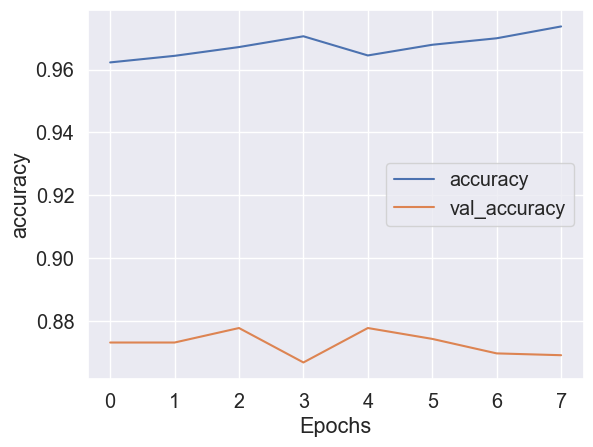

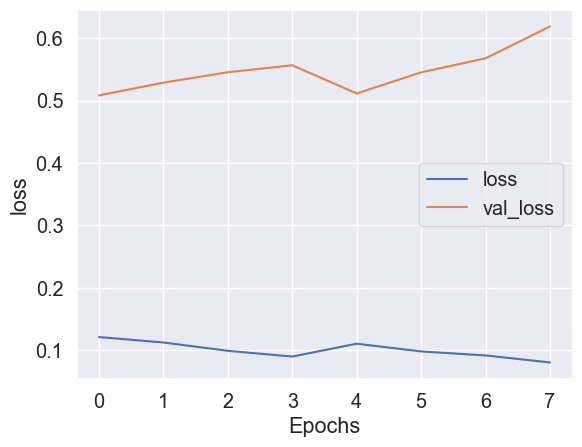

In [78]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [81]:
true_labels = np.argmax(testing_labels, axis=1)
predicted_probabilities = model.predict(testing_padded)
predicted_labels = np.argmax(predicted_probabilities, axis=1)


55/55 [==============================] - 2s 21ms/step


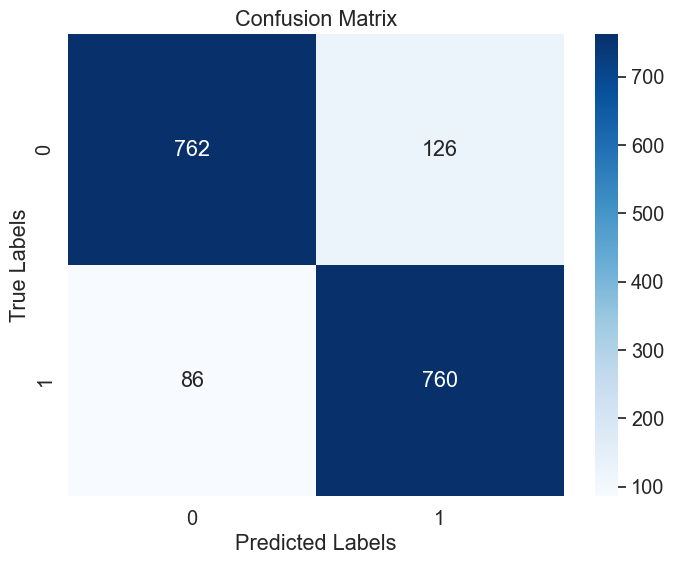

In [82]:

true_labels = np.argmax(testing_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [83]:
model.save("Arabic_senti.h5")

In [72]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import mlflow
import mlflow.keras
import json
import os

# Ensure these variables are defined
embedding_dim = 128  # Set your embedding dimension
lstm1_dim = 64       # Set LSTM layer 1 units
lstm2_dim = 64       # Set LSTM layer 2 units
dense_dim = 64       # Set Dense layer units
NUM_EPOCHS = 10      # Set the number of epochs

# Set MLflow tracking URI and experiment
mlflow.set_tracking_uri("https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow")
mlflow.set_experiment(experiment_id=2)

import os
os.environ['MLFLOW_TRACKING_USERNAME'] = 'asamy4194' # 'learnpythonlanguage'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '951cd23d2b7cec538703bd36d2e2fbef6a209ec8' #
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow' # https://dagshub.com/learnpythonlanguage/mlflow_dagshub_demo.mlflow


# Model definition
vocab_size = len(tokenizer.word_index) + 1  # Ensure 'tokenizer' is defined

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(dense_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# MLflow logging
with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("vocab_size", vocab_size)
    mlflow.log_param("embedding_dim", embedding_dim)
    mlflow.log_param("lstm1_dim", lstm1_dim)
    mlflow.log_param("lstm2_dim", lstm2_dim)
    mlflow.log_param("dense_dim", dense_dim)
    mlflow.log_param("learning_rate", 1e-4)
    mlflow.log_param("dropout_rate", 0.3)
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model and log metrics
    history = model.fit(training_padded, training_labels, 
                        epochs=NUM_EPOCHS, 
                        validation_data=(testing_padded, testing_labels), 
                        callbacks=[early_stopping], 
                        verbose=2)
    
    # Log metrics
    for epoch, train_acc in enumerate(history.history['accuracy']):
        mlflow.log_metric('train_accuracy', train_acc, step=epoch)
    for epoch, val_acc in enumerate(history.history['val_accuracy']):
        mlflow.log_metric('val_accuracy', val_acc, step=epoch)

    # Log the model to MLflow
    mlflow.keras.log_model(model, "model")

    # Save training history to a JSON file and log it as an artifact
    history_file = "history.json"
    with open(history_file, 'w') as f:
        json.dump(history.history, f)
    mlflow.log_artifact(history_file)

    # End the MLflow run
    mlflow.end_run()

# Additional training, if needed
history_additional = model.fit(training_padded, training_labels, 
                               epochs=10, 
                               validation_data=(testing_padded, testing_labels), 
                               callbacks=[early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         3511552   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 batch_normalization (BatchN  (None, None, 128)        512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                        

2024/10/17 15:18:40 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\asamy\AppData\Local\Temp\tmpb75xal0y\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\asamy\AppData\Local\Temp\tmpb75xal0y\model\data\model\assets
2024/10/17 15:19:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 15:21:08 INFO mlflow.tracking._tracking_service.client: üèÉ View run glamorous-hawk-503 at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/2/runs/8d5a17a32dc5463cbc21d49db57f2710.
2024/10/17 15:21:08 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/2.


Epoch 1/10
1030/1030 [==============================] - 46s 44ms/step - loss: 0.2004 - accuracy: 0.9458 - val_loss: 0.3977 - val_accuracy: 0.8858
Epoch 2/10
1030/1030 [==============================] - 44s 43ms/step - loss: 0.1564 - accuracy: 0.9537 - val_loss: 0.4586 - val_accuracy: 0.8743
Epoch 3/10
1030/1030 [==============================] - 43s 41ms/step - loss: 0.1311 - accuracy: 0.9588 - val_loss: 0.4730 - val_accuracy: 0.8864
Epoch 4/10
1030/1030 [==============================] - 41s 40ms/step - loss: 0.1141 - accuracy: 0.9631 - val_loss: 0.4662 - val_accuracy: 0.8847


In [73]:
model.save("mlflow_model.h5")

In [74]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import mlflow
import mlflow.keras
import json
import os

# Set MLflow tracking URI and experiment
mlflow.set_tracking_uri("https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow")
mlflow.set_experiment(experiment_id=2)

os.environ['MLFLOW_TRACKING_USERNAME'] = 'asamy4194'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '951cd23d2b7cec538703bd36d2e2fbef6a209ec8'

# Define model parameters
embedding_dim = 128
filters = 128  # Number of filters for Conv1D layers
kernel_size = 5  # Kernel size for Conv1D
dense_dim = 64
NUM_EPOCHS = 10

# CNN Model Definition
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=training_padded.shape[1]),
    
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    
    tf.keras.layers.Dense(dense_dim, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Print model summary
model_cnn.summary()

# MLflow logging for the CNN model
with mlflow.start_run(run_name="CNN Model"):
    # Log model parameters
    mlflow.log_param("vocab_size", vocab_size)
    mlflow.log_param("embedding_dim", embedding_dim)
    mlflow.log_param("filters", filters)
    mlflow.log_param("kernel_size", kernel_size)
    mlflow.log_param("dense_dim", dense_dim)
    mlflow.log_param("learning_rate", 1e-4)
    mlflow.log_param("dropout_rate", 0.3)
    
    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the CNN model
    history_cnn = model_cnn.fit(training_padded, training_labels, 
                                epochs=NUM_EPOCHS, 
                                validation_data=(testing_padded, testing_labels), 
                                callbacks=[early_stopping], 
                                verbose=2)
    
    # Log training metrics
    for epoch, train_acc in enumerate(history_cnn.history['accuracy']):
        mlflow.log_metric('train_accuracy', train_acc, step=epoch)
    for epoch, val_acc in enumerate(history_cnn.history['val_accuracy']):
        mlflow.log_metric('val_accuracy', val_acc, step=epoch)

    # Log the CNN model
    mlflow.keras.log_model(model_cnn, "cnn_model")

    # Save the training history as a JSON file
    history_cnn_file = "cnn_history.json"
    with open(history_cnn_file, 'w') as f:
        json.dump(history_cnn.history, f)
    mlflow.log_artifact(history_cnn_file)

    # End the MLflow run
    mlflow.end_run()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          3511552   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           82048     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                      

2024/10/17 15:25:01 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\asamy\AppData\Local\Temp\tmpfc9khcqu\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\asamy\AppData\Local\Temp\tmpfc9khcqu\model\data\model\assets
2024/10/17 15:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/17 15:26:39 INFO mlflow.tracking._tracking_service.client: üèÉ View run CNN Model at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/2/runs/9a366e4aa79a457fa7d584df24c38390.
2024/10/17 15:26:39 INFO mlflow.tracking._tracking_service.client: üß™ View experiment at: https://dagshub.com/asamy4194/DEPI_Final_Project.mlflow/#/experiments/2.


In [75]:
model.save("mlflow_model_2.h5")